# K-nearest neighbours code


The K-nearest neighbours algrorithm is often used as a baseline method as it is simple to understand. 
The method considers one nearest neighbour: it does this by finding the closest training data point to the prediction point. The prediction is then simply the known output for that data point. When considering more than one neighbour a voting system is used to assign a label. For more than one class we can count how many neighbours belong to each class and predict the most common 

In [1]:
#import relevant modules 
#import relevant libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier


In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [27]:
#read in the dataset 
df = pd.read_csv('dataset.csv')

In [28]:
df.head(10) #checking correct dataset is imported 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


feature scaling is not required for k-nearest neighbours 
Therefore, the algorithm can be simply applied to the dataset 


In [29]:
#eliminate empty rows 
df = df.dropna()
df.isna().sum()
df.columns

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [30]:
#dropped glucose, so that medians were not required 
df = df.drop('glucose', axis =1)

In [31]:
#split dataset in training and testing data
#clarify what is y and what is x label
y = df['TenYearCHD']
X = df.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [32]:
#three neighbors specified for model 
KN = KNeighborsClassifier(n_neighbors=3)

In [33]:
#implement KNeighbors 
KN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [35]:
print('Test set accuracy:{:.5f}'.format(KN.score(X_test, y_test)))

Test set accuracy:0.80464


In [38]:
y_pred = KN.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[571  33]
 [110  18]]


Can see that th model is about 80% accurate.

# Testing alogorithm for varying number of neighbours to increase accuracy

In [12]:
#increase number of neighbours to 5 
KN5 = KNeighborsClassifier(n_neighbors=5)
KN5.fit(X_train, y_train)
print('Test set accuracy:{:.5f}'.format(KN5.score(X_test, y_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Test set accuracy:0.81011


In [13]:
#increase to 10 neighbours 
KN10 = KNeighborsClassifier(n_neighbors=10)
KN10.fit(X_train, y_train)
print('Test set accuracy:{:.5f}'.format(KN10.score(X_test, y_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Test set accuracy:0.82104


In [14]:
#deleting glucose and current smoker columns, due to correlations
df = df.drop('currentSmoker', axis=1)

In [15]:
#repeat KN algorithm 
#split dataset in training and testing data
#clarify what is y and what is x label
y = df['TenYearCHD']
X = df.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [16]:
#three neighbors specified for model 
KN3 = KNeighborsClassifier(n_neighbors=3)
KN3.fit(X_train, y_train)
print('Test set accuracy:{:.5f}'.format(KN3.score(X_test, y_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Test set accuracy:0.80464


In [17]:
KN5 = KNeighborsClassifier(n_neighbors=5)
KN5.fit(X_train, y_train)
print('Test set accuracy:{:.5f}'.format(KN5.score(X_test, y_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Test set accuracy:0.81011


In [18]:
KN10 = KNeighborsClassifier(n_neighbors=10)
KN10.fit(X_train, y_train)
print('Test set accuracy:{:.5f}'.format(KN10.score(X_test, y_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Test set accuracy:0.82104


Accuracy results show that eliminating current smoker or not column has no effect on the accuracy of the model. However, increasing number of neighbours does. 

In [19]:
#Using KN10 with eliminated rows
normalized_df_KN10_pred = KN10.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_KN10_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_KN10_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_KN10_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_KN10_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

print('Values for 10 neighbours')

The accuracy score for KNN is: 82.1%
The f1 score for KNN is: 4.3999999999999995%
The precision score for KNN is: 33.300000000000004%
The recall score for KNN is: 2.3%
Values for 10 neighbours


In [23]:
acc_test = KN10.score(X_test, y_test)
acc_test
acc_train = KN10.score(X_train, y_train)
acc_train

# Perform cross validation
# Cross Validation is used to assess the predictive performance of the models and and to judge how they perform outside the sample to a new data set 

cv_results = cross_val_score(KN10, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)

print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))

print('Cross-validation for 10 neighbors')

0.8210382513661202

0.8560191518467852

Cross-validated scores: [0.84016393 0.8442623  0.84541724 0.84268126 0.84657534]
Accuracy: 0.84 (+/- 0.00)
Cross-validation for 10 neighbors


less neigbors suggesting more precise than more neighbors, but more neighbors increases accuracy

In [24]:
#Comparison between number of neighbours 3,5 and 10 compared. 20 -50 
KN20 = KNeighborsClassifier(n_neighbors=20)
KN20.fit(X_train, y_train)
print('Test set accuracy:{:.5f}, 20 neighbors'.format(KN20.score(X_test, y_test)))

KN30 = KNeighborsClassifier(n_neighbors=30)
KN30.fit(X_train, y_train)
print('Test set accuracy:{:.5f}, 30 neighbors'.format(KN30.score(X_test, y_test)))

KN40 = KNeighborsClassifier(n_neighbors=40)
KN40.fit(X_train, y_train)
print('Test set accuracy:{:.5f}, 40 neighbors'.format(KN40.score(X_test, y_test)))

KN50 = KNeighborsClassifier(n_neighbors=5)
KN50.fit(X_train, y_train)
print('Test set accuracy:{:.5f}, 50 neighbors'.format(KN50.score(X_test, y_test)))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

Test set accuracy:0.82650, 20 neighbors


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

Test set accuracy:0.82514, 30 neighbors


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=40, p=2,
           weights='uniform')

Test set accuracy:0.82377, 40 neighbors


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Test set accuracy:0.81011, 50 neighbors


In [25]:
#comparison between precision 
normalized_df_KN3_pred = KN3.predict(X_test)
normalized_df_KN5_pred = KN5.predict(X_test)
normalized_df_KN10_pred = KN10.predict(X_test)
normalized_df_KN20_pred = KN20.predict(X_test)
normalized_df_KN30_pred = KN30.predict(X_test)
normalized_df_KN40_pred = KN40.predict(X_test)
normalized_df_KN50_pred = KN50.predict(X_test)




precision = precision_score(y_test, normalized_df_KN3_pred)
print(f"The precision score for KNN3 is: {round(precision,3)*100}%")

precision = precision_score(y_test, normalized_df_KN5_pred)
print(f"The precision score for KNN5 is: {round(precision,3)*100}%")

precision = precision_score(y_test, normalized_df_KN10_pred)
print(f"The precision score for KNN10 is: {round(precision,3)*100}%")

precision = precision_score(y_test, normalized_df_KN20_pred)
print(f"The precision score for KNN20 is: {round(precision,3)*100}%")

precision = precision_score(y_test, normalized_df_KN30_pred)
print(f"The precision score for KNN30 is: {round(precision,3)*100}%")

precision = precision_score(y_test, normalized_df_KN40_pred)
print(f"The precision score for KNN40 is: {round(precision,3)*100}%")

precision = precision_score(y_test, normalized_df_KN50_pred)
print(f"The precision score for KNN50 is: {round(precision,3)*100}%")


The precision score for KNN3 is: 35.3%
The precision score for KNN5 is: 29.599999999999998%
The precision score for KNN10 is: 33.300000000000004%
The precision score for KNN20 is: 100.0%
The precision score for KNN30 is: 0.0%
The precision score for KNN40 is: 0.0%
The precision score for KNN50 is: 29.599999999999998%


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
#create accuracy dataframe 
d = {'Number_neighbours': [3,5, 10, 20, 30, 40 , 50], 'accuracy': [KN3.score(X_test, y_test), KN5.score(X_test, y_test),KN10.score(X_test, y_test), KN20.score(X_test, y_test), KN30.score(X_test, y_test), KN40.score(X_test, y_test), KN50.score(X_test, y_test)]}

df1 = pd.DataFrame(data=d)

Text(0.5,0,'K value')

Text(0,0.5,'accuracy %')

<function matplotlib.pyplot.show(*args, **kw)>

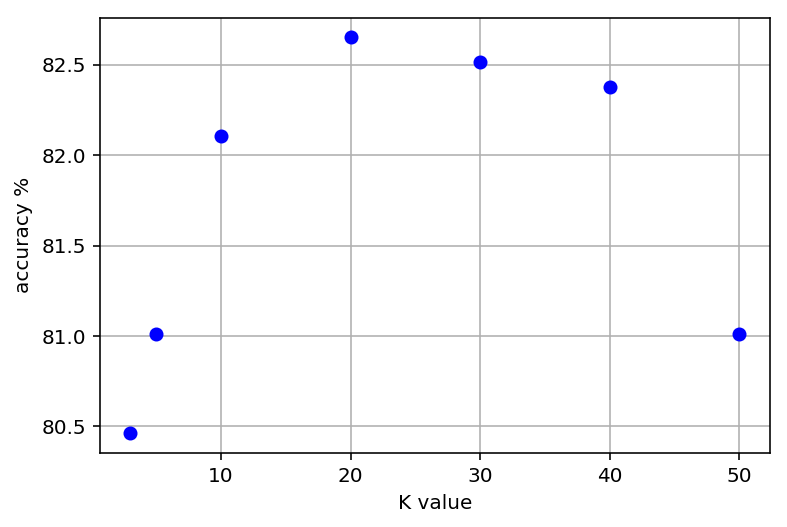

In [85]:
plt.plot(df1['Number_neighbours'], df1['accuracy']*100, 'bo')
plt.xlabel('K value')
plt.ylabel('accuracy %')
plt.grid()
plt.show